In [1]:
# libraries that we will need
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [173]:
#data location
train_Data = "day_night_images\\training"
test_Data = "day_night_images\\test"

In [174]:
#augmentation for train data
train_aug = ImageDataGenerator(
    rescale=1./255,               
    rotation_range=20,            
    width_shift_range=0.1,        
    height_shift_range=0.1,       
    shear_range=0.1,              
    zoom_range=0.1,              
    horizontal_flip=True,         
    fill_mode='nearest'           
)

#no need to make augmentation for test data only rescale
test_aug = ImageDataGenerator(
    rescale=1./255
    )

In [175]:
#load data to keras
img_size = (128, 128)
batch_size = 32
ready_trian = train_aug.flow_from_directory(
    train_Data,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary'  
)
ready_test = test_aug.flow_from_directory(
    test_Data,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary'
)

Found 240 images belonging to 2 classes.


Found 160 images belonging to 2 classes.


In [176]:
print(ready_trian.samples)
print(ready_trian.class_indices)
print(ready_trian.classes)

240
{'day': 0, 'night': 1}
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


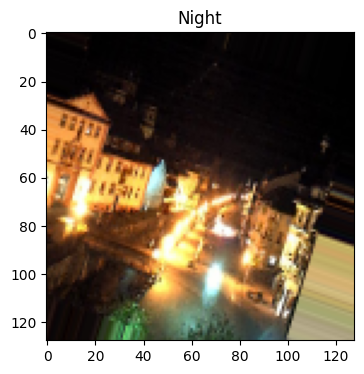

In [177]:
#show the img after add augmentation
images, labels = next(ready_trian)
plt.figure(figsize=(4, 4))
plt.imshow(images[0])
plt.title('Day' if labels[0] == 0 else 'Night')
plt.show()

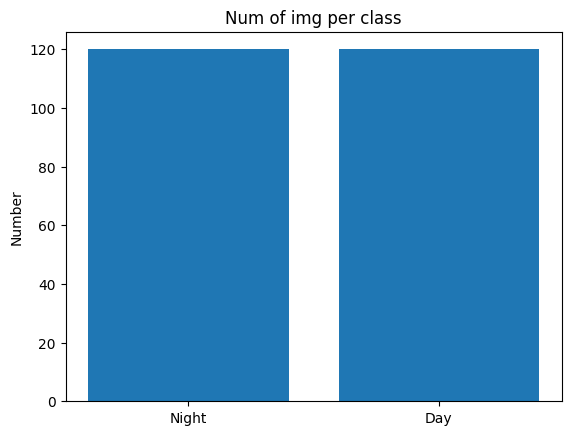

In [182]:
night_num=np.sum(ready_trian.classes == 1)
day_num=np.sum(ready_trian.classes == 0)
plt.bar([ 'Night','Day'], [night_num,day_num])
plt.title('Num of img per class')
plt.ylabel('Number')
plt.show()

In [183]:
#bulitd the CNN
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D(2, 2),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')  # Binary output
])

In [184]:
model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_24 (Conv2D)              │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_24 (MaxPooling2D) │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_25 (Conv2D)              │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_25 (MaxPooling2D) │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_26 (Conv2D)              │ (None, 28, 28, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_26 (MaxPooling2D) │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_27 (Conv2D)              │ (None, 12, 12, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_27 (MaxPooling2D) │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_7 (Flatten)             │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 64)             │       147,520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 240,833 (940.75 KB)

 Trainable params: 240,833 (940.75 KB)

 Non-trainable params: 0 (0.00 B)

In [185]:
#compile the model 
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [186]:
# training😁
# if the model does not improving it will stop training
early_stop = EarlyStopping(
    monitor='val_loss',       
    patience=5,               
    restore_best_weights=True 
)

epochs = 20

history = model.fit(
    ready_trian,
    epochs=epochs,
    validation_data=ready_test,
    callbacks=[early_stop]  
)

C:\Users\ym268\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 247ms/step - accuracy: 0.6335 - loss: 0.6412 - val_accuracy: 0.9125 - val_loss: 0.2855
Epoch 2/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 216ms/step - accuracy: 0.9028 - loss: 0.2668 - val_accuracy: 0.9688 - val_loss: 0.0889
Epoch 3/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 220ms/step - accuracy: 0.9578 - loss: 0.1189 - val_accuracy: 0.9062 - val_loss: 0.2390
Epoch 4/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 219ms/step - accuracy: 0.9858 - loss: 0.0601 - val_accuracy: 0.9750 - val_loss: 0.0876
Epoch 5/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 219ms/step - accuracy: 0.9863 - loss: 0.0287 - val_accuracy: 0.7937 - val_loss: 0.8604
Epoch 6/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 236ms/step - accuracy: 0.9316 - loss: 0.1497 - val_accuracy: 0.9125 - val_loss: 0.4835
Epoch 7/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 217ms/step - accuracy: 0.9706 - loss: 0.0967 - val_accuracy: 0.9750 - val_loss: 0.0689
Epoch 8/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 214ms/step - accuracy: 1.0000 - loss: 0.0102 - val_accuracy: 0.9625 - val_loss:

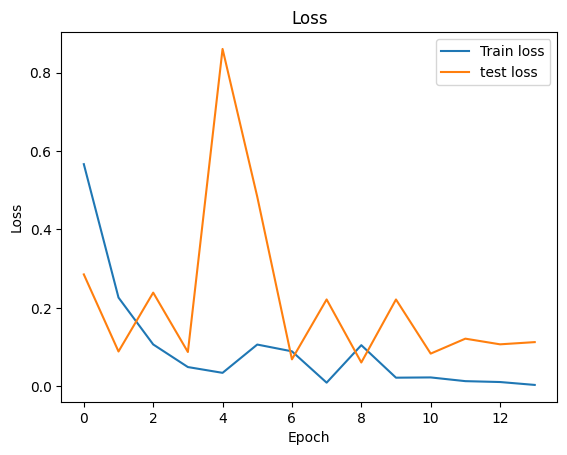

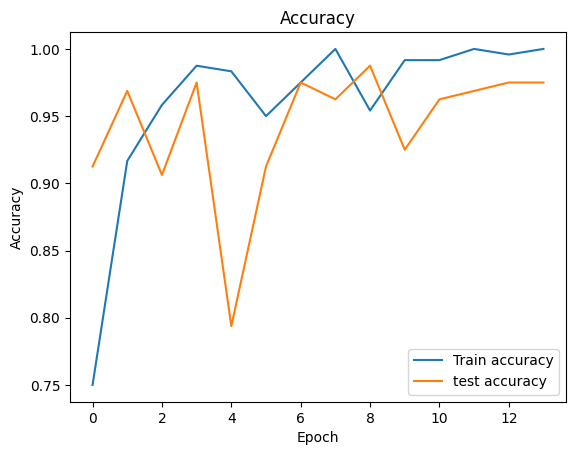

In [187]:
# plot loss
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='test loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss')
plt.legend()
plt.show()

# plot Accuracy
plt.plot(history.history['accuracy'], label='Train accuracy')
plt.plot(history.history['val_accuracy'], label='test accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy')
plt.legend()
plt.show()

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


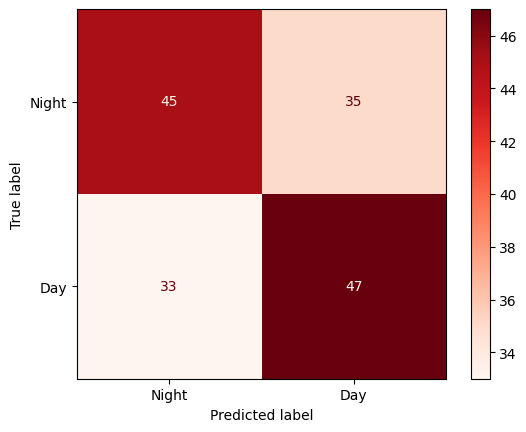

[0 1 0 0 1 0 1 1 0 0 1 0 1 1 1 0 0 1 0 0 1 1 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0
 1 1 1 0 1 0 0 1 1 1 0 1 0 1 1 1 1 1 1 0 0 1 0 0 1 0 1 0 0 0 0 1 1 0 0 0 0
 1 0 0 0 0 1 1 1 1 0 0 0 1 0 1 0 1 0 1 1 0 0 0 0 1 0 1 1 1 1 0 0 0 1 1 0 0
 0 0 1 0 1 0 1 1 0 1 1 1 0 1 1 1 0 0 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 0 1 0
 0 1 1 0 1 1 1 1 1 1 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1]


In [189]:
pred = model.predict(ready_test)
pred = np.round(pred).astype(int).flatten()
true = ready_test.classes

con_mat = confusion_matrix(true, pred)

con_mat_display = ConfusionMatrixDisplay(confusion_matrix=con_mat, display_labels=['Night', 'Day'])
con_mat_display.plot(cmap=plt.cm.Reds)
plt.show()
print(pred)
print(true)


In [190]:
test_loss, test_acc = model.evaluate(ready_test)
print(f" Test Accuracy: {test_acc:.2f}")
print(f" Test loss: {test_loss:.2f}")

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - accuracy: 0.9845 - loss: 0.0708
 Test Accuracy: 0.99
 Test loss: 0.06


In [191]:
model.save("day_night_model.keras")
print("DONE")

DONE
